<h3  style = "text-align:center;font-size:40px;font-family:courier">Movie Visualization &<br>Recommendation System</h3>

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

<h3 style = "text-align:center;font-size:30px;font-family:courier">Exploratory Data Analysis and Data Cleaning</h3>

In [7]:
movie = pd.read_csv('/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv')
movie.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [8]:
import pandasql as psql # using sql for some exploration

Q1 = """  
    with temp as (select cast(replace(VOTES,",","") as integer) as VOTES from movie)
    
    select MOVIES, YEAR, GENRE,RATING, cast(replace(VOTES,",","") as integer) as VOTES
    from movie 
    where RATING >= (select avg(RATING) as avr_rating from movie)
    and VOTES >= (select avg(VOTES) from temp)
    order by RATING desc, VOTES desc
    limit 20
    """
psql.sqldf(Q1)

,MOVIES,YEAR,GENRE,RATING,VOTES
0,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.9,8813
1,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.8,5283
2,Dark,(2017–2020),"\nCrime, Drama, Mystery",9.7,20230
3,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.7,2770
4,Dexter,(2006–2013),"\nCrime, Drama, Mystery",9.6,8434
5,BoJack Horseman,(2014–2020),"\nAnimation, Comedy, Drama",9.6,4910
6,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.6,4263
7,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.6,4212
8,Anne,(2017–2019),"\nDrama, Family",9.6,2178
9,The Dragon Prince,(2018– ),"\nAnimation, Adventure, Drama",9.6,727


In [9]:
Q2 = """
     select GENRE, max(RATING) as highest_rate
     from movie  
     group by GENRE
     order by highest_rate desc
     limit 10
     """
psql.sqldf(Q2)

,GENRE,highest_rate
0,"\nAnimation, Comedy, Drama",9.9
1,"\nAnimation, Action, Adventure",9.9
2,"\nCrime, Drama, Mystery",9.8
3,"\nAnimation, Adventure, Comedy",9.7
4,"\nDrama, Family",9.6
5,\nDocumentary,9.6
6,"\nAnimation, Adventure, Drama",9.6
7,"\nDrama, Fantasy, Horror",9.5
8,"\nAction, Comedy, Drama",9.5
9,"\nAction, Adventure, Drama",9.5


### Context for each columns
* MOVIES: Movie name
* YEAR: The year of movie or tv shows telecast for audience
* GENRE: Genre of the Movie/ TV Shows
* RATING: The audience thought about movie or tv show given
* ONE-LINE: The short description about movie or tv show for audience first impression
* STARS: The casting 
* VOTES: The audience express their view
* RunTime: The duration of running time 
* Gross: Global earning for the movie/ tv shows

In [10]:
# Checking for Missing Values
movie.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [12]:
print("Missing Values:\n")
for col in movie.columns:
    missing = movie[col].isna().sum()
    percent = missing / movie.shape[0] * 100
    print("%s: %.2f%% (%d)" % (col,percent,missing))

Missing Values:

MOVIES: 0.00% (0)
YEAR: 6.44% (644)
GENRE: 0.80% (80)
RATING: 18.20% (1820)
ONE-LINE: 0.00% (0)
STARS: 0.00% (0)
VOTES: 18.20% (1820)
RunTime: 29.58% (2958)
Gross: 95.40% (9539)


In [13]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### Cleaning some of the features

In [14]:
# Removing "\n" from GENRE, ONE-LINE, and STARS columns
for col in ['GENRE','ONE-LINE','STARS']:
    movie[col] = movie[col].str.replace("\n","").str.strip()

movie.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN


In [15]:
# Creating New Column Director and Stars by extracting Director(s) and Stars from orignial STARS column
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0] # The Second Half is the stars
        return director.split(":")[1] # Return the Director name
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1] # last value in this list will be the stars

movie['Director'] = movie['STARS'].apply(lambda d: extract_director(d))
movie['Stars'] = movie['STARS'].apply(lambda s: extract_stars(s))

# View head of these columns
movie[['STARS','Director','Stars']].head()

,STARS,Director,Stars
0,Director:Peter Thorwarth| Stars:Peri Baume...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Parnell, Spencer G...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:Matt...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


<h3 style = "text-align:center;font-size:30px;font-family:courier">Data Visualization</h3>

### Years

In [16]:
# Extracting Year from original YEARS column

movie['Year'] = movie['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
movie['Year'] = movie['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )',"–")
    else:
        return year.replace(')',"")

movie['Year'] = movie['Year'].fillna('Unknown')
movie['Year'] = movie['Year'].apply(lambda y: extract_year(y))
    
year_count = movie[movie['Year'] != 'Unknown']['Year'].value_counts().reset_index().rename(columns = {'Year':'Count','index':'Year'})
year_count.head()

,Year,Count
0,2020–,898
1,2020,742
2,2021–,661
3,2019,657
4,2019–,553


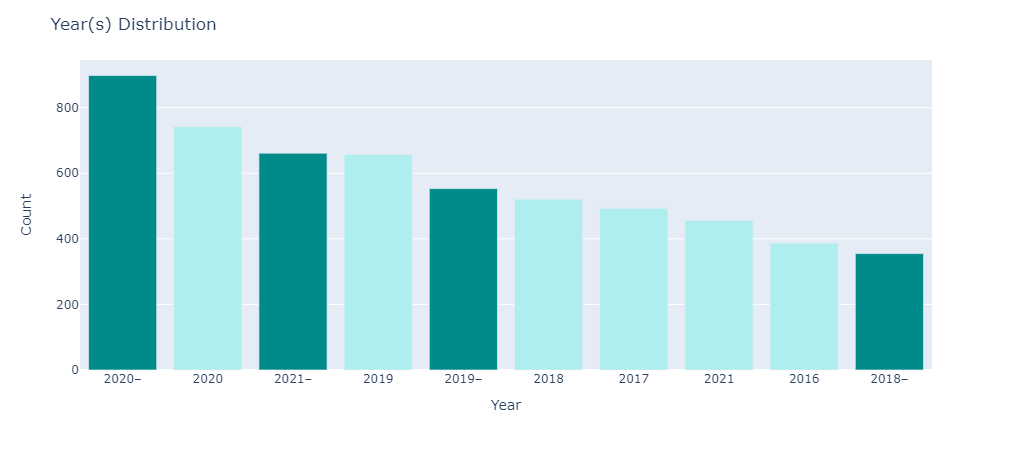

In [17]:
colors = ['paleturquoise'] * 10
colors[0],colors[2],colors[4],colors[-1] = 'darkcyan','darkcyan','darkcyan','darkcyan'

fig = px.bar(data_frame = year_count.head(10),
             x = 'Year', y = 'Count')

fig.update_traces(marker_color = colors)

fig.update_layout(title = 'Year(s) Distribution')

fig.show()

### Rating

In [18]:
print("Statistical value of [{}]".format('Rating'))

# Average Rating 
print("Mean:", round(movie['RATING'].mean(),2))

# Median Rating
print("Median:", movie['RATING'].median())

# Max Rating
print("Max:", movie['RATING'].max())

Statistical value of [Rating]
Mean: 6.92
Median: 7.1
Max: 9.9


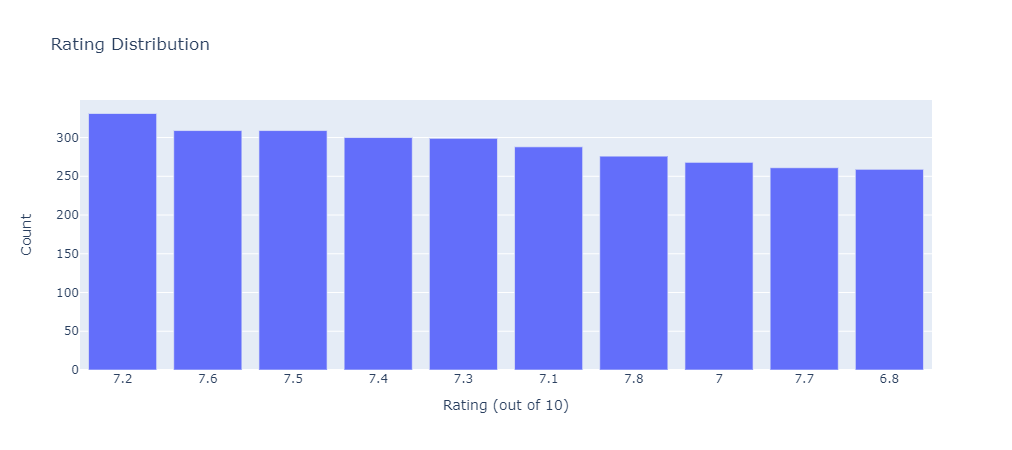

In [19]:
fig = px.bar(data_frame = movie['RATING'].value_counts().reset_index().head(10),
             x = 'index', y = 'RATING',
             title = 'Rating Distribution')

fig.update_yaxes(title = 'Count')

fig.update_xaxes(type ='category',
                 title = 'Rating (out of 10)')

fig.show()

### RunTime

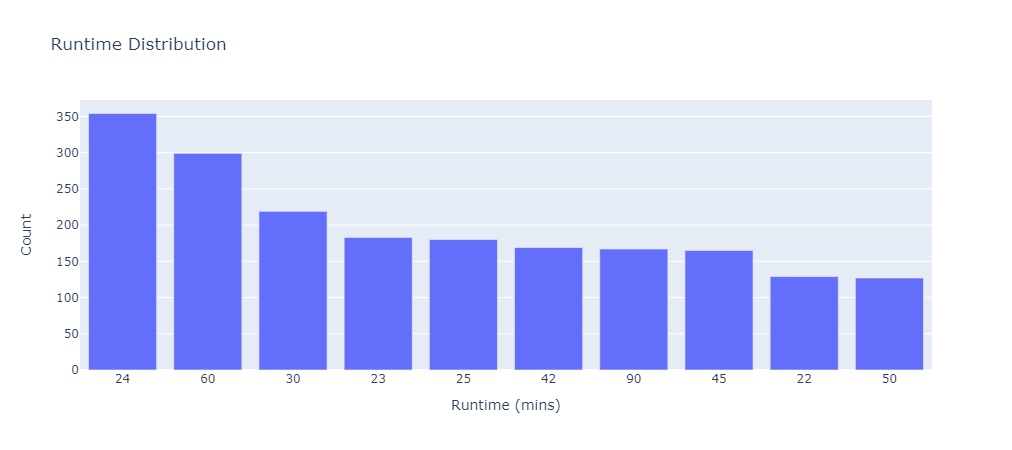

In [20]:
fig = px.bar(data_frame = movie['RunTime'].value_counts().reset_index().head(10),
             x = 'index', y = 'RunTime',
             title = 'Runtime Distribution')

fig.update_yaxes(title = 'Count')

fig.update_xaxes(type ='category',
                 title = 'Runtime (mins)')

fig.show()

### Voting

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
 9   Director  9999 non-null   object 
 10  Stars     9999 non-null   object 
 11  Year      9999 non-null   object 
dtypes: float64(2), object(10)
memory usage: 937.5+ KB


In [22]:
movie['VOTES'] = movie['VOTES'].str.replace(",","")
movie['VOTES'] 

0        21062
1        17870
2       885805
3       414849
4          NaN
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: VOTES, Length: 9999, dtype: object

In [23]:
movie['VOTES'] = movie['VOTES'].fillna(0)
movie['VOTES'] = movie['VOTES'].astype(int)
movie['VOTES'].sort_values(ascending = False)

111     1713028
193     1691777
16      1552311
260     1529752
132     1227522
         ...   
7039          0
7040          0
7041          0
7042          0
9998          0
Name: VOTES, Length: 9999, dtype: int64

### Genre

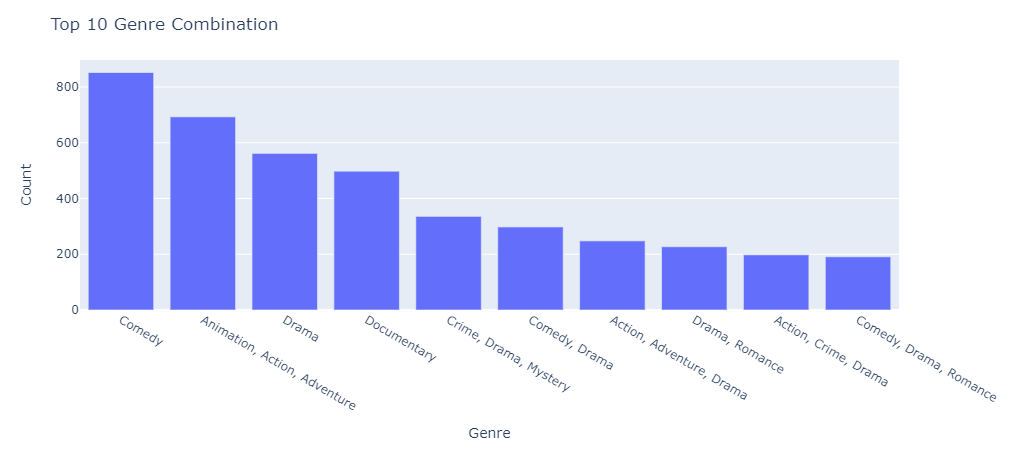

In [24]:
movie_genre = movie['GENRE'].value_counts().reset_index().rename(columns={'GENRE':'Count','index':'Genre'})

fig = px.bar(data_frame = movie_genre.sort_values(by='Count',ascending = False).head(10),
             x = 'Genre', y = 'Count')

fig.update_layout(title = 'Top 10 Genre Combination')

fig.show()

### Looking at Individual Genre

In [25]:
# Count number of Genre
from collections import Counter

genre_raw = movie['GENRE'].dropna().to_list()
genre_list = list()

for genres in genre_raw:
    genres = genres.split(", ")
    for g in genres:
        genre_list.append(g)
        
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_df.head()

,Count
Action,2258
Horror,553
Thriller,910
Animation,1732
Adventure,1792


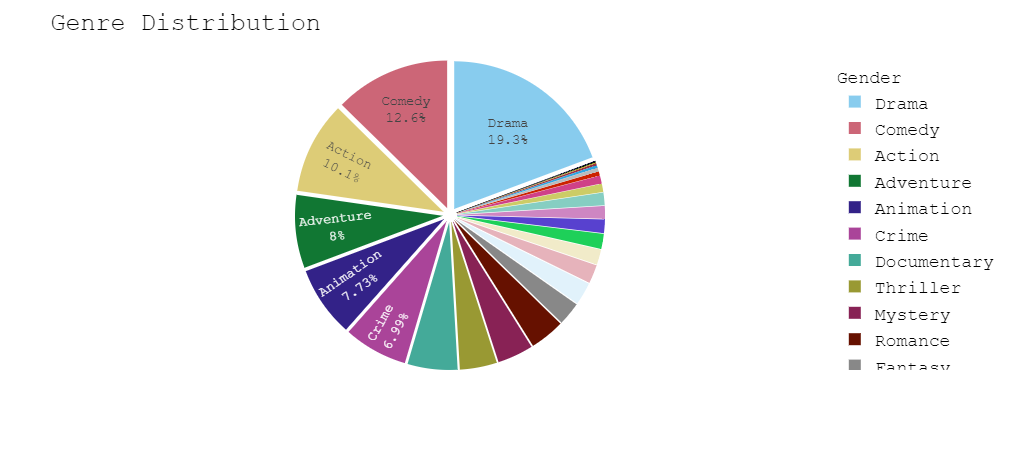

In [26]:
# Genre Count Ditribution
fig = px.pie(data_frame = genre_df,
             values = 'Count',
             names = genre_df.index,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_traces(textposition = 'inside',
                  textinfo = 'label+percent',
                  pull = [0.05] * len(genre_df.index.to_list()))

fig.update_layout(title = {'text':'Genre Distribution'},
                  legend_title = 'Gender',
                  uniformtext_minsize=13,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))


fig.show()

### Director

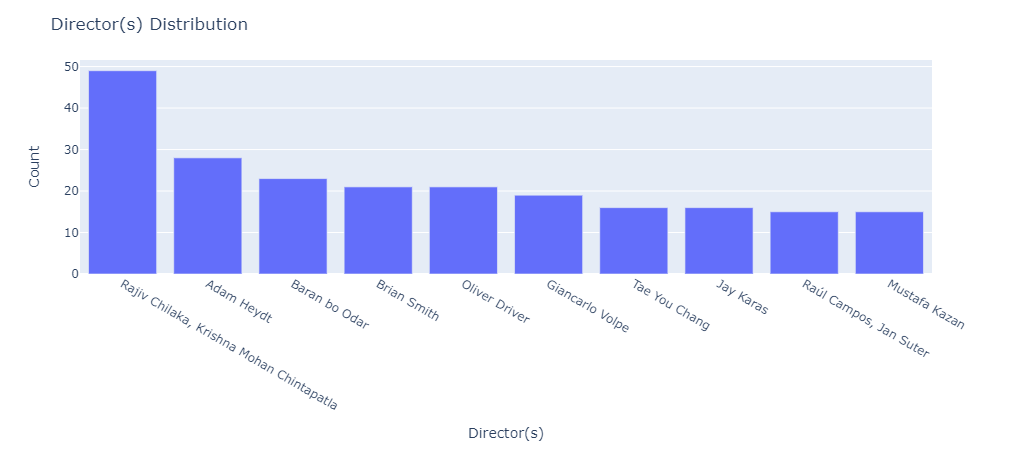

In [27]:
fig = px.bar(data_frame = movie[~(movie['Director'] == "")]['Director'].value_counts().reset_index().head(10),
             x = 'index', y = 'Director')

fig.update_layout(title = 'Director(s) Distribution',
                  xaxis_title = 'Director(s)',
                  yaxis_title = 'Count')

fig.show()



### Stars

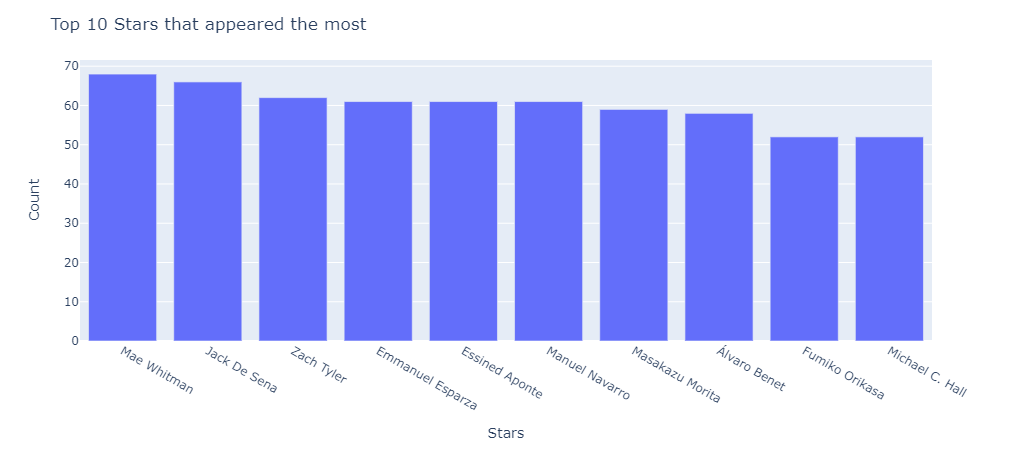

In [28]:
stars_list = list()

for stars in movie[movie['Stars'] != ""]['Stars'].to_list():
    stars = stars.split(", ")
    for s in stars:
        stars_list.append(s)

stars_df = pd.DataFrame.from_dict(Counter(stars_list), orient = 'index').rename(columns = {0:'Count'})
stars_df = stars_df.sort_values(by='Count',ascending = False)

fig = px.bar(data_frame = stars_df.head(10),
             x = stars_df.head(10).index, y = 'Count')

fig.update_layout(title = 'Top 10 Stars that appeared the most',
                  xaxis_title = 'Stars',
                  yaxis_title = 'Count')


fig.show()

### Gross

In [29]:
gross_df = movie[~movie['Gross'].isna()] # New Dataframe with no NaN in Gross column

# Extract the numerical value
def extract_gross(gross):
    return float(gross.replace("$","").replace("M",""))

# Unit is Million US Dollar
gross_df['Gross'] = gross_df['Gross'].apply(lambda g: extract_gross(g))

# Highest Gross Movie
print("Highest Gross movie:",gross_df.iloc[gross_df['Gross'].argmax()]['MOVIES'])

Highest Gross movie: Beauty and the Beast


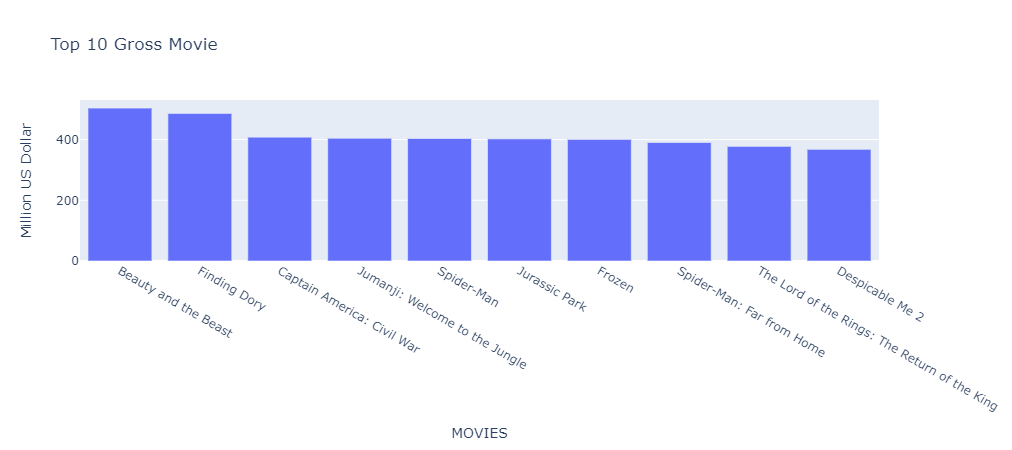

In [30]:
fig = px.bar(data_frame = gross_df.sort_values(by='Gross', ascending = False).head(10),
             x = 'MOVIES', y = 'Gross',
             title = 'Top 10 Gross Movie')
fig.update_layout(yaxis_title = 'Million US Dollar')
fig.show()

<h3 style = "text-align:center;font-size:30px;font-family:courier">Content-based Filtering Movie Recommendation System</h3>

In [31]:
# Features  using GENRE, RATING??, ONE-LINE, RunTime??, Director, Stars

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

features = ['GENRE','ONE-LINE','Director','Stars']

# Filling in missing values with Blank String
for feature in features:
    movie[feature] = movie[feature].fillna("")

movie['combined_features'] = movie['GENRE'] + " " + movie['ONE-LINE'] + " " + movie['Director'] + " " + movie['Stars'] 
cv = CountVectorizer()
count_matrix = cv.fit_transform(movie['combined_features'])
cosine_sim = cosine_similarity(count_matrix)

In [33]:
# Function for movie recommendation
def movie_recommendation(mov,sim_num = 5):

    user_choice = mov
    
    try:
        ref_index = movie[movie['MOVIES'].str.contains(user_choice, case = False)].index[0]

        similar_movies = list(enumerate(cosine_sim[ref_index]))

        sorted_simmilar_movies = sorted(similar_movies, key = lambda x: x[1], reverse = True)[1:]

        print('\nRecomended Movies for [{}]'.format(user_choice))
        print('-'*(24 + len(user_choice)))

        for i, element in enumerate(sorted_simmilar_movies):
            similar_movie_id = element[0]
            similar_movie_title = movie['MOVIES'].iloc[similar_movie_id]
            s_score = element[1]
            print('{:40} -> {:.3f}'.format(similar_movie_title, s_score))

            if i > sim_num:
                break
    except IndexError:
        print("\n[{}] is not in our database!".format(user_choice))
        print("We couldn't recommend anyting...Sorry...")

In [35]:
# Search for movie with the keyword
def movie_available(key):
    
    keyword = key
    
    print("Movie with keyword: [{}]".format(keyword))
    
    for i, mov in enumerate(movie[movie['MOVIES'].str.contains(keyword)]['MOVIES'].to_list()):
        print("{}) {} ".format(i+1,mov))

In [36]:
# Running the Function
movie_available("Spider")

Movie with keyword: [Spider]
1) Spider-Man: Far from Home 
2) Spider-Man 
3) The Girl in the Spider's Web 
4) Escape From Spiderhead 
5) The Spectacular Spider-Man 


In [37]:
# Running the Function 
movie_recommendation("Spider-Man: Far from home")


Recomended Movies for [Spider-Man: Far from home]
-------------------------------------------------
Batman v Superman: Dawn of Justice       -> 0.313
Quantum Quest: A Cassini Space Odyssey   -> 0.309
Kong: Skull Island                       -> 0.305
Liu lang di qiu                          -> 0.300
Jumanji: The Next Level                  -> 0.293
Avatar: The Last Airbender               -> 0.291
Jupiter's Legacy                         -> 0.290


In [38]:
# Running the Function with argument
movie_recommendation("Spider-Man: Far from home",10)


Recomended Movies for [Spider-Man: Far from home]
-------------------------------------------------
Batman v Superman: Dawn of Justice       -> 0.313
Quantum Quest: A Cassini Space Odyssey   -> 0.309
Kong: Skull Island                       -> 0.305
Liu lang di qiu                          -> 0.300
Jumanji: The Next Level                  -> 0.293
Avatar: The Last Airbender               -> 0.291
Jupiter's Legacy                         -> 0.290
 Avatar: The Last Airbender              -> 0.289
The Division                             -> 0.288
This Perfect Day                         -> 0.287
The Hitman's Bodyguard                   -> 0.286
Mercenaire                               -> 0.281


<h4 style = "font-family:courier;font-size:20px">This reccomendation might not be the same as to what you might find on the internet because not all the movies are recorded in this dataset.<h4>
<h3 style = "font-family:courier;font-size:40px;text-align:center">Thank you for checking out my work!</h3>